# Generate the ETT-curves
This notebook generates ett for each building.

In [1]:
import orchest
from et import ET, ETT
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 5)

In [2]:
data = orchest.get_inputs()

clarify_data = data['clarify_data']
temperature_df = clarify_data['temperature']

normalized_data = data['normalized_data']
energy_consumption_dfs = normalized_data['energy_consumption']

building_dfs = energy_consumption_dfs['daily']
daily_temp = temperature_df['daily']['Voll TAN']

## ET, Regressor and Optimizer
The ET class and ETT class has friendly methods based on the ET regression model generated by the regressor.

The ET.fit (previously refered to as regressor) fits the ET model based on energy vs temp.
The ETT.fit (previously refered to as optimizer) finds suitable parameters for the regressor and ET class (PPS and threshold) and fits the models to the data. In other words we create 7 ET objects, one for each weekday.

These classes have been moved to et.py

## Create ETT for all buildings
To show result we also plot the ET-curves for the two first ETTs.

/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


ETT for Angelltrøa barnehage:
Monday


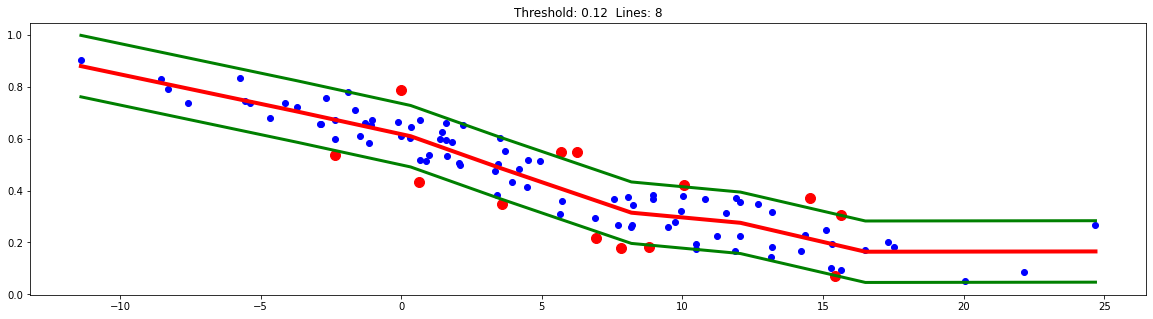

Tuesday


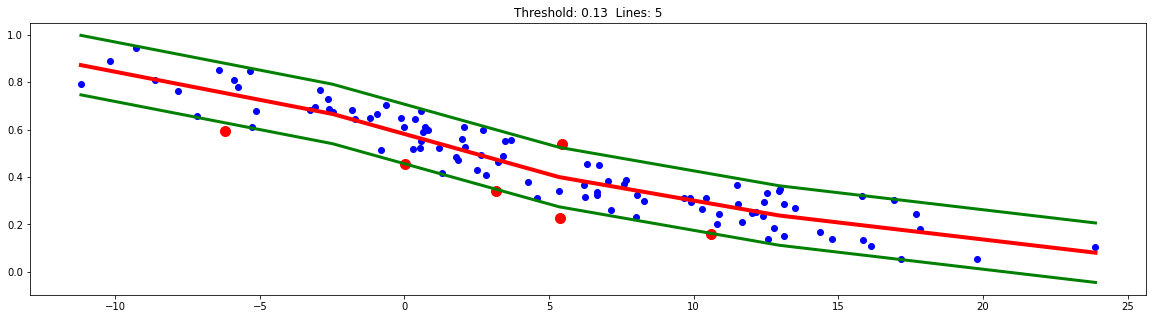

Wednesday


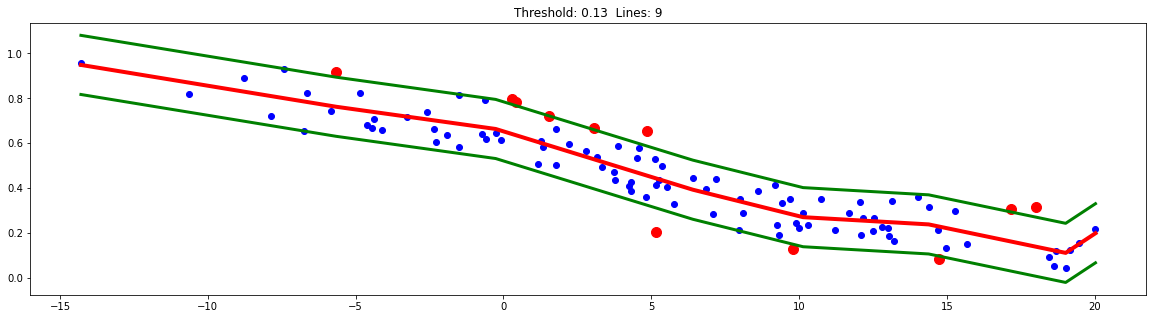

Thursday


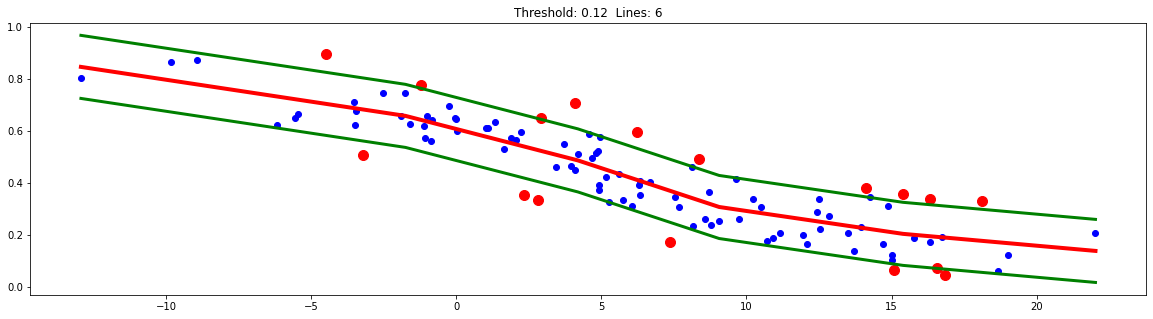

Friday


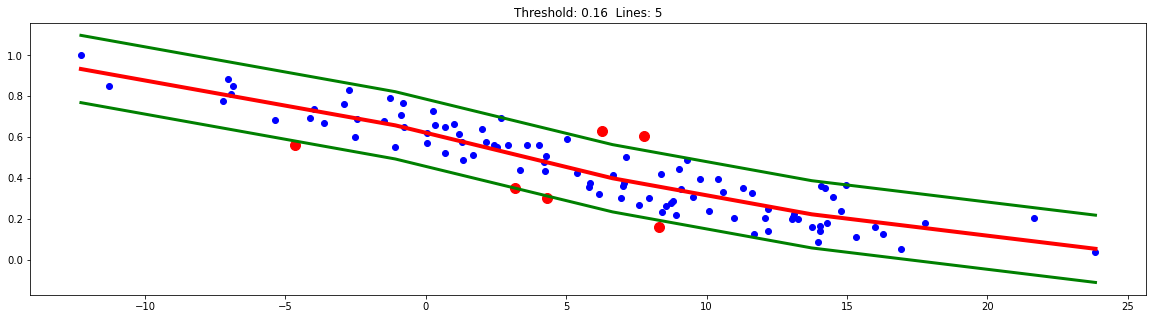

Saturday


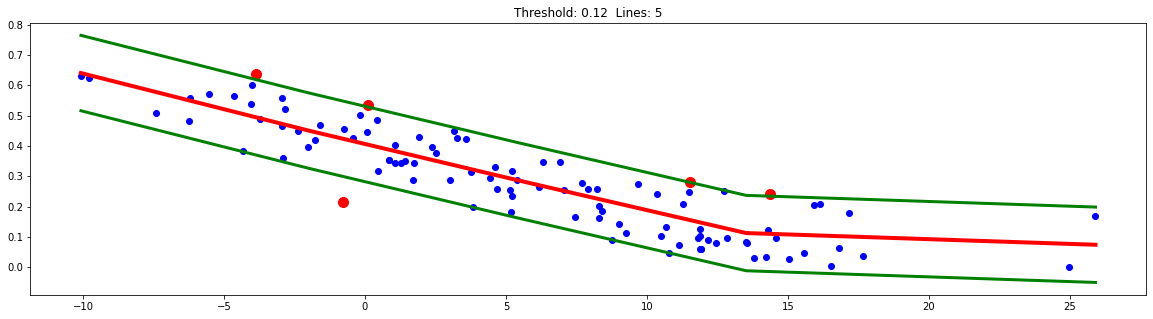

Sunday


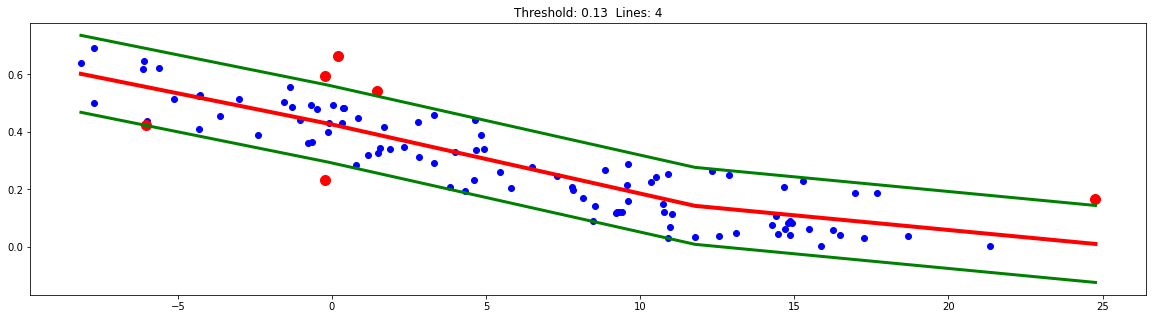

ETT for Blomsterbyen barnehage:
Monday


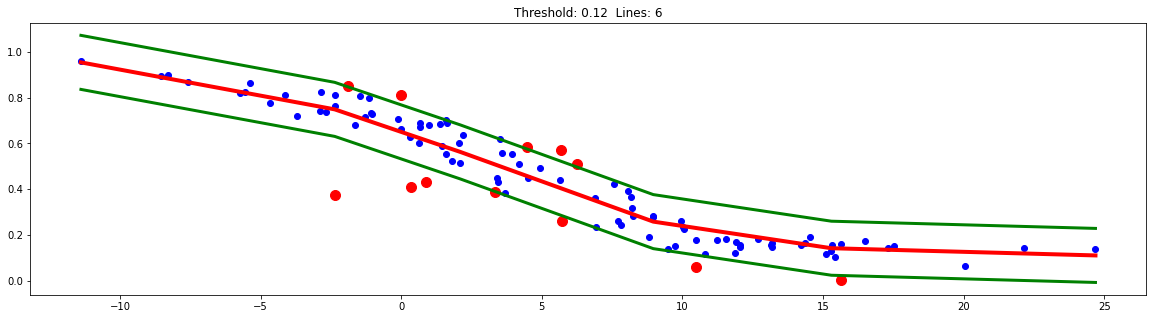

Tuesday


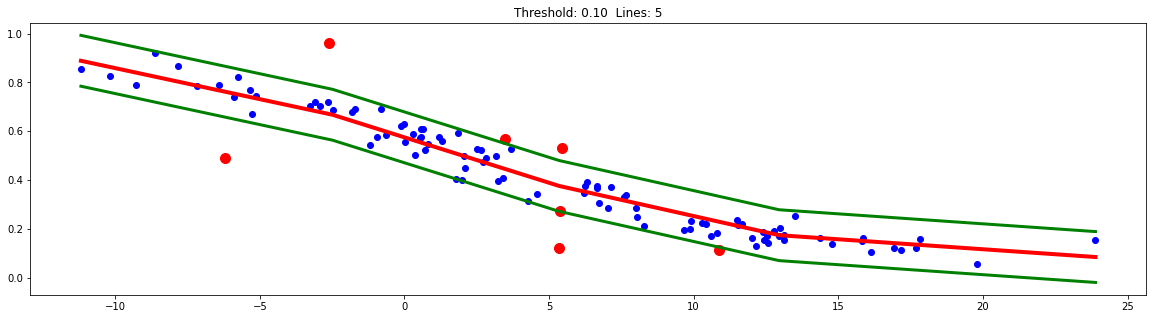

Wednesday


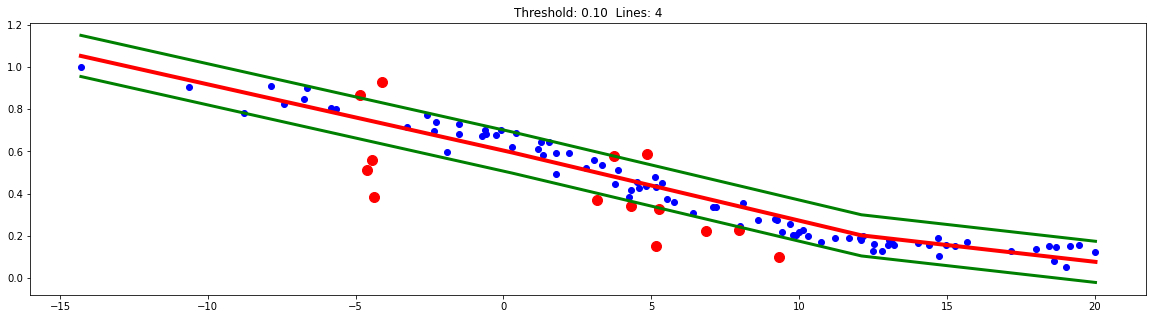

Thursday


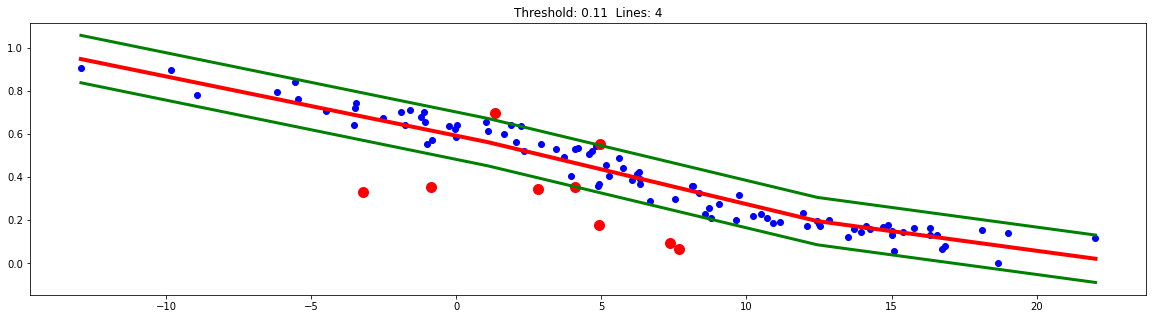

Friday


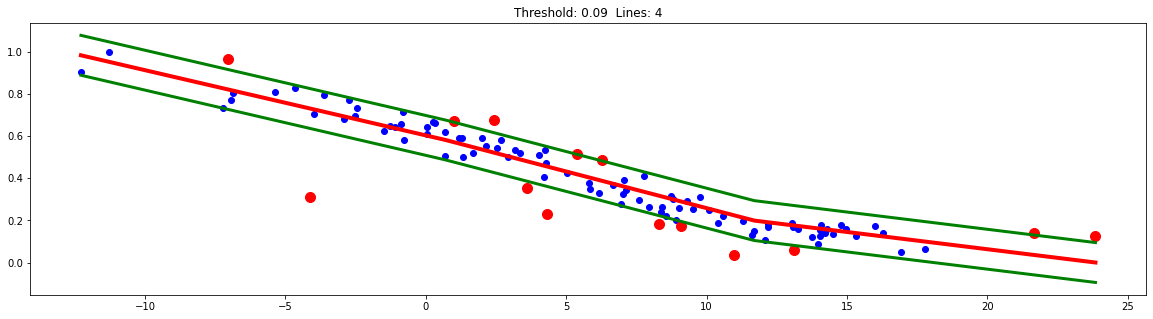

Saturday


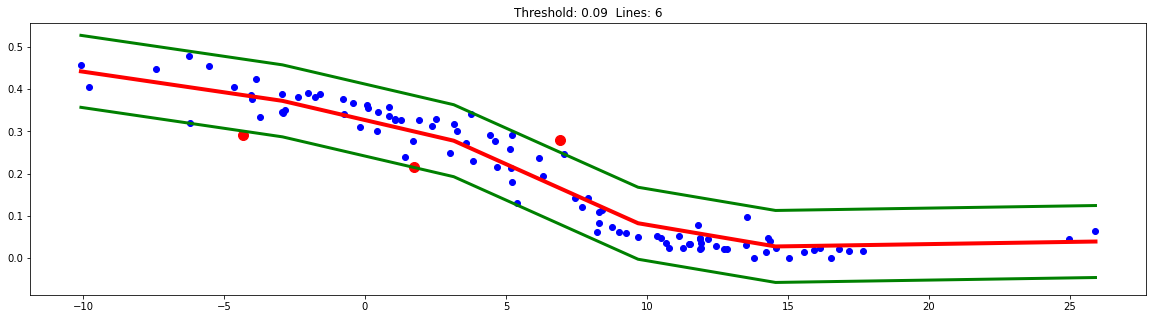

Sunday


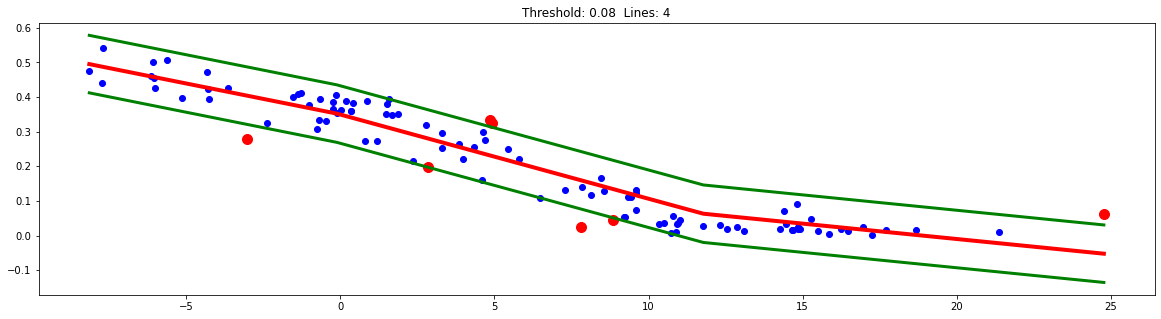

/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


No ETT found for Hammersborg barnehage


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


No ETT found for Smidalen barnehage


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


No ETT found for Sverresborg Friluftsbarnehage


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


In [3]:
num_ett_to_plot = 2

# create ETT curves for all buildings
ETTs = {}
i = 0
for building_name, building_data in list(building_dfs.items()):
    building_energy = building_data['Totalt']
    # create ETT for this building
    ett = ETT()
    success = ett.fit(daily_temp, building_energy)
    if not success:
        print('No ETT found for ' + building_name)
        continue
    
    if i < num_ett_to_plot:
        print(f'ETT for {building_name}:')
        ett.plot(building_energy, daily_temp)
    i += 1
    
    ETTs[building_name] = ett

In [4]:
et_curves = {
    'ett_day_of_week': ETTs
}

In [5]:
print('outputting generated et curves...')
orchest.output(et_curves, name='et_curves')
print('success')

outputting generated et curves...
success
